Goal - which inv to pick

In [28]:
import yfinance as yf
import os
import pyfolio as pf
os.chdir('C:/Users/10265729/Desktop/Pratik/Data Science Bootcamp/Project 1')
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [29]:
def download_data(stock, start, end):
    data = yf.download(stock, start, end)
    return data

In [30]:
stocks = ['SPY', 'QQQ','GLD', 'TIP', 'VWO']
data = download_data(stocks, '2000-1-1', '2022-12-31')
data.to_csv('Mul.csv')


[*********************100%***********************]  5 of 5 completed


In [31]:
data.dropna()
p_spy = data['Pct_Change_SPY'] = data['Close']['SPY'].pct_change()
p_qqq = data['Pct_Change_QQQ'] = data['Close']['QQQ'].pct_change()
p_gld = data['Pct_Change_GLD'] = data['Close']['GLD'].pct_change()
p_tip = data['Pct_Change_TIP'] = data['Close']['TIP'].pct_change()
p_vwo = data['Pct_Change_VWO'] = data['Close']['VWO'].pct_change()
data

Adj Close                                                 \
                   GLD         QQQ         SPY         TIP        VWO   
Date                                                                    
2000-01-03         NaN   81.471092   95.308784         NaN        NaN   
2000-01-04         NaN   75.882065   91.581650         NaN        NaN   
2000-01-05         NaN   73.947418   91.745468         NaN        NaN   
2000-01-06         NaN   68.868843   90.271004         NaN        NaN   
2000-01-07         NaN   77.386810   95.513634         NaN        NaN   
...                ...         ...         ...         ...        ...   
2022-12-23  167.259995  267.359985  382.910004  106.930000  38.750000   
2022-12-27  168.669998  263.579987  381.399994  106.440002  39.360001   
2022-12-28  167.910004  260.100006  376.660004  106.320000  38.790001   
2022-12-29  168.850006  266.440002  383.440002  106.760002  39.459999   
2022-12-30  169.639999  266.279999  382.429993  106.440002  38.980000   

                 Close                                                 ...  \
                   GLD         QQQ         SPY         TIP        VWO  ...   
Date                                                                   ...   
2000-01-03         NaN   94.750000  145.437500         NaN        NaN  ...   
2000-01-04         NaN   88.250000  139.750000         NaN        NaN  ...   
2000-01-05         NaN   86.000000  140.000000         NaN        NaN  ...   
2000-01-06         NaN   80.093750  137.750000         NaN        NaN  ...   
2000-01-07         NaN   90.000000  145.750000         NaN        NaN  ...   
...                ...         ...         ...         ...        ...  ...   
2022-12-23  167.259995  267.359985  382.910004  106.930000  38.750000  ...   
2022-12-27  168.669998  263.579987  381.399994  106.440002  39.360001  ...   
2022-12-28  167.910004  260.100006  376.660004  106.320000  38.790001  ...   
2022-12-29  168.850006  266.440002  383.440002  106.760002  39.459999  ...   
2022-12-30  169.639999  266.279999  382.429993  106.440002  38.980000  ...   

               Volume                                             \
                  GLD       QQQ       SPY        TIP         VWO   
Date                                                               
2000-01-03        NaN  36345200   8164300        NaN         NaN   
2000-01-04        NaN  33786600   8089800        NaN         NaN   
2000-01-05        NaN  42496600  12177900        NaN         NaN   
2000-01-06        NaN  37134800   6227200        NaN         NaN   
2000-01-07        NaN  28138200   8066500        NaN         NaN   
...               ...       ...       ...        ...         ...   
2022-12-23  2912300.0  39373600  59857300  2523500.0  14616500.0   
2022-12-27  6885700.0  38009000  51638200  2464500.0  13829000.0   
2022-12-28  3662500.0  47139000  70911500  3091400.0  15688000.0   
2022-12-29  3345900.0  45893600  66970900  3141300.0  13383100.0   
2022-12-30  2863300.0  37796100  83975100  4694200.0  15760600.0   

           Pct_Change_SPY Pct_Change_QQQ Pct_Change_GLD Pct_Change_TIP  \
                                                                         
Date                                                                     
2000-01-03            NaN            NaN            NaN            NaN   
2000-01-04      -0.039106      -0.068602            NaN            NaN   
2000-01-05       0.001789      -0.025496            NaN            NaN   
2000-01-06      -0.016071      -0.068677            NaN            NaN   
2000-01-07       0.058076       0.123683            NaN            NaN   
...                   ...            ...            ...            ...   
2022-12-23       0.005752       0.002249       0.002998      -0.002239   
2022-12-27      -0.003944      -0.014138       0.008430      -0.004582   
2022-12-28      -0.012428      -0.013203      -0.004506      -0.001127   
2022-12-29       0.018000       0.024375       0.005598 

In [133]:
spy = (data['Pct_Change_SPY']+1).cumprod()
qqq = (data['Pct_Change_QQQ']+1).cumprod()
gld = (data['Pct_Change_GLD']+1).cumprod()
tip = (data['Pct_Change_TIP']+1).cumprod()
vwo = (data['Pct_Change_VWO']+1).cumprod()



Start date,2000-01-03
End date,2022-12-30
Total months,275
,Backtest
Annual return,6.237%
Cumulative returns,301.254%
Annual volatility,19.857%
Sharpe ratio,0.40
Calmar ratio,0.11
Stability,0.85
Max drawdown,-55.189%


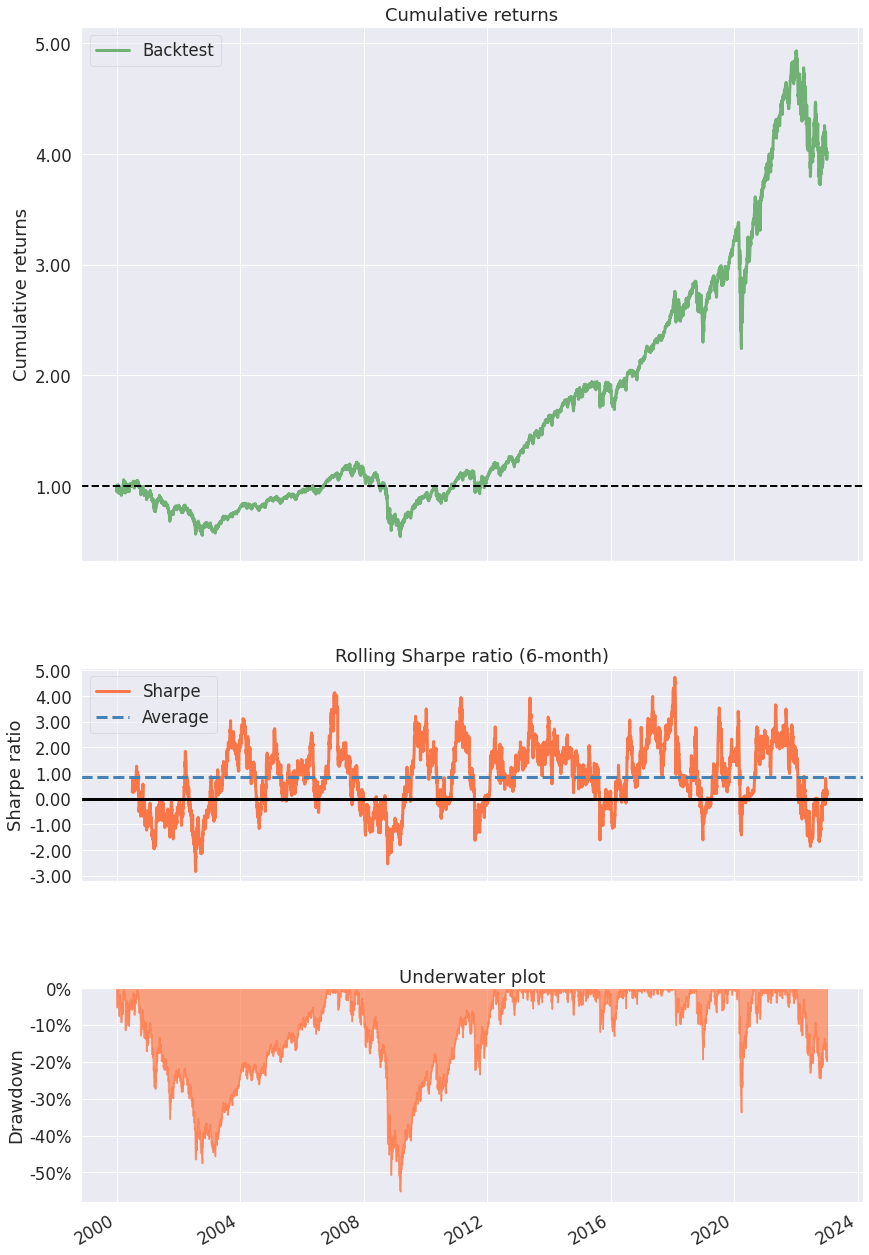

In [35]:
pf.create_simple_tear_sheet(data['Adj Close']['SPY'].pct_change())



Start date,2000-01-03
End date,2022-12-30
Total months,275
,Backtest
Annual return,5.292%
Cumulative returns,226.84%
Annual volatility,27.654%
Sharpe ratio,0.32
Calmar ratio,0.06
Stability,0.77
Max drawdown,-82.964%


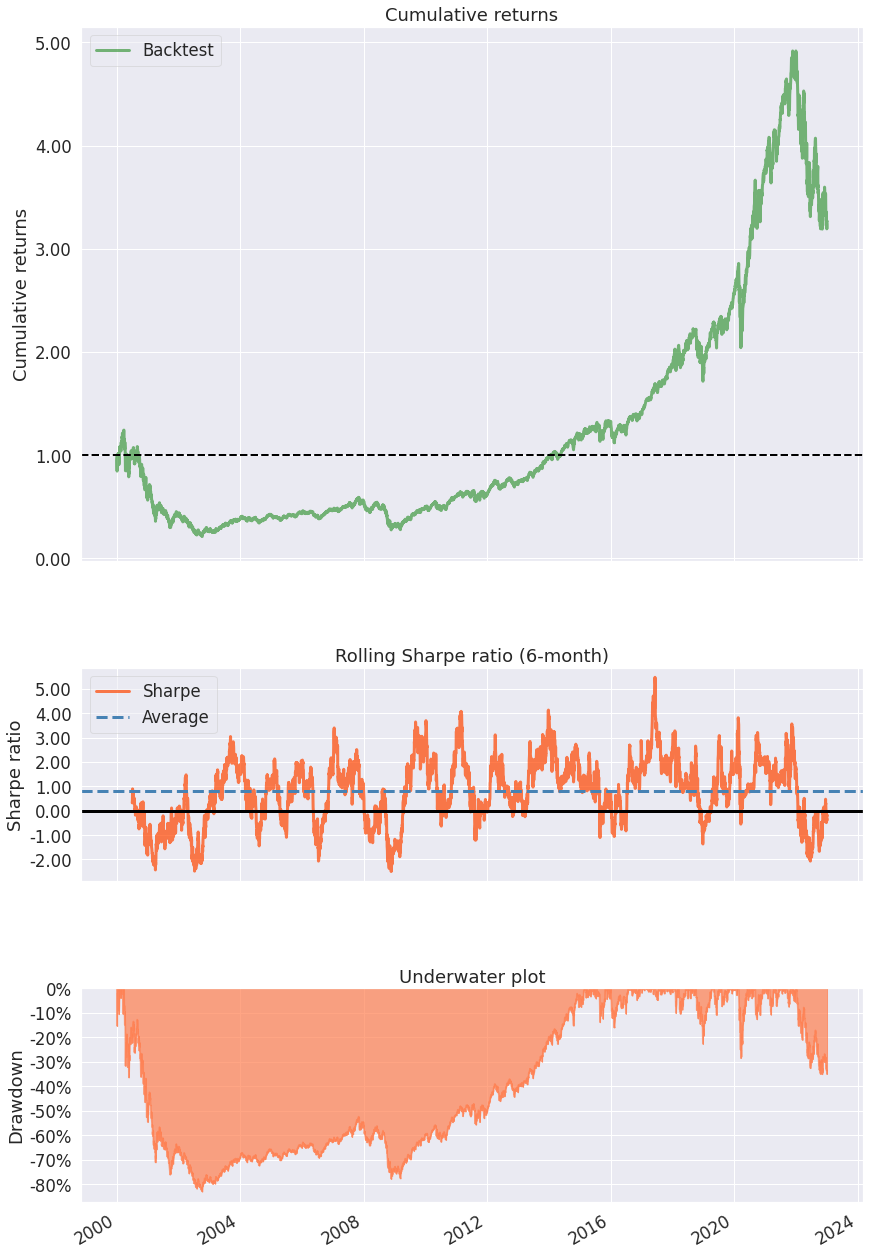

In [36]:
pf.create_simple_tear_sheet(data['Adj Close']['QQQ'].pct_change(),)

Start date,2000-01-03
End date,2022-12-30
Total months,275
,Backtest
Annual return,6.013%
Cumulative returns,282.244%
Annual volatility,17.856%
Sharpe ratio,0.50
Calmar ratio,0.13
Stability,0.62
Max drawdown,-45.555%


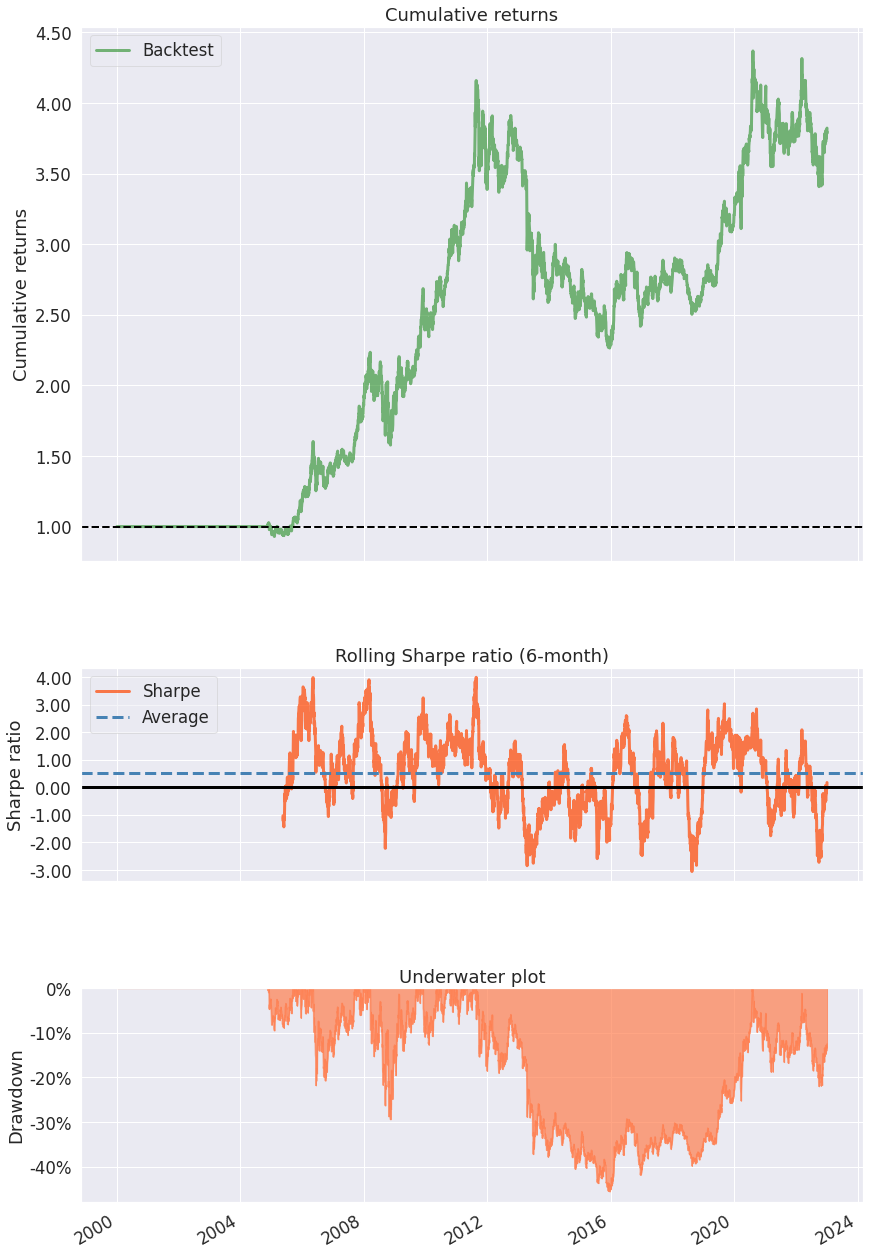

In [37]:
pf.create_simple_tear_sheet(data['Adj Close']['GLD'].pct_change())

Start date,2000-01-03
End date,2022-12-30
Total months,275
,Backtest
Annual return,4.02%
Cumulative returns,147.212%
Annual volatility,27.675%
Sharpe ratio,0.32
Calmar ratio,0.06
Stability,0.62
Max drawdown,-67.683%


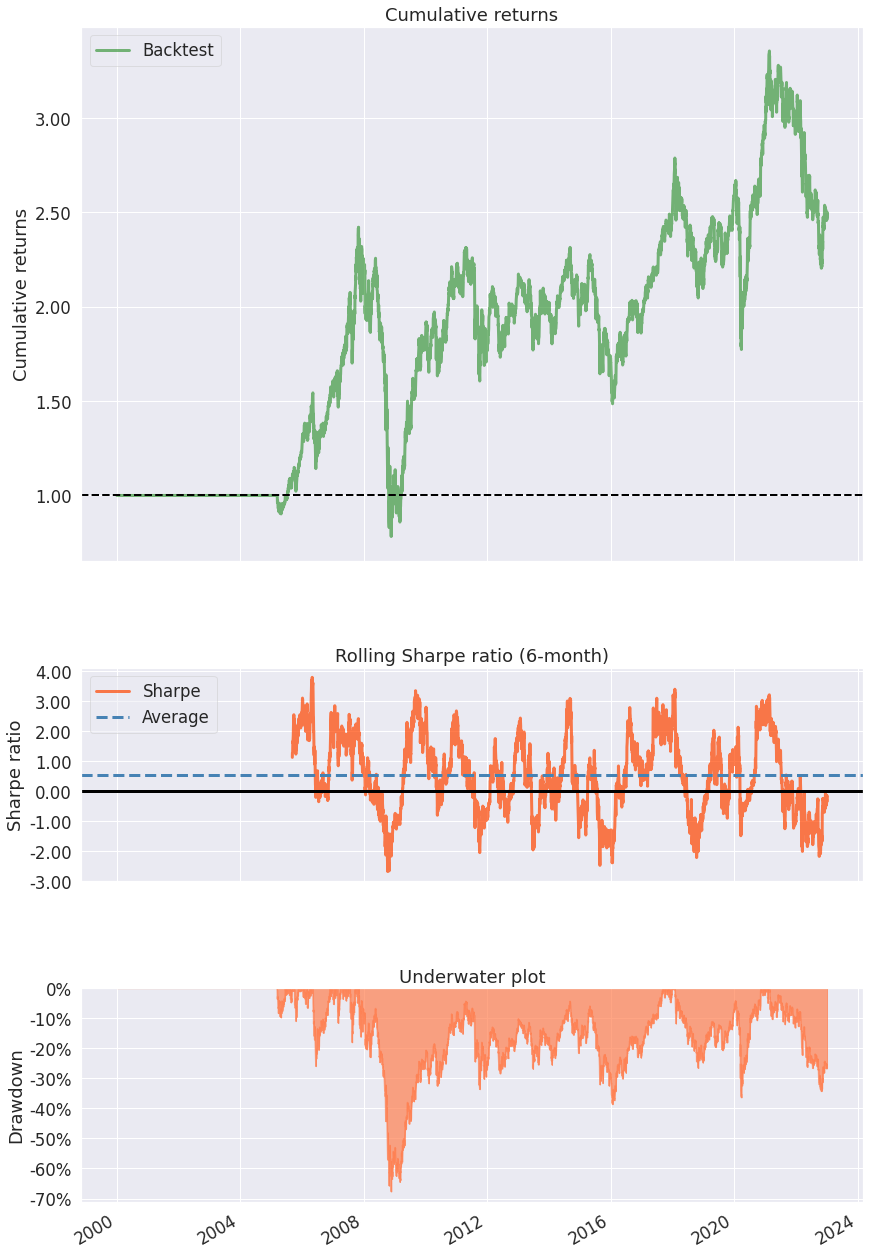

In [38]:
pf.create_simple_tear_sheet(data['Adj Close']['VWO'].pct_change())

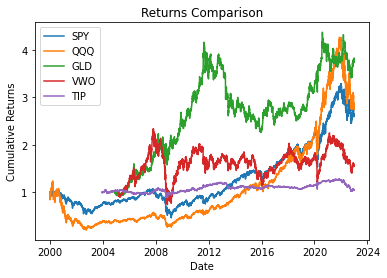

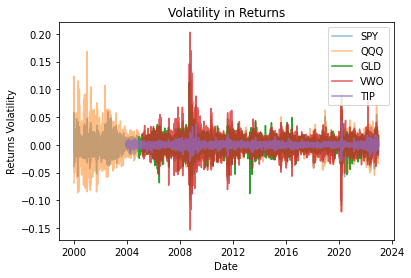

<AxesSubplot:title={'center':'Annual returns'}, xlabel='Returns', ylabel='Year'>

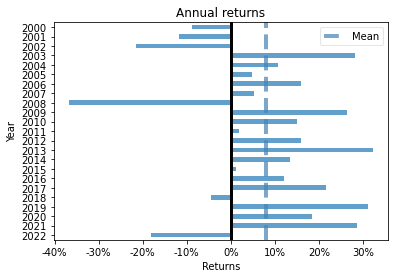

In [139]:
plt.plot(spy)
plt.plot(qqq)
plt.plot(gld)
plt.plot(vwo)
plt.plot(tip)

plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.title('Returns Comparison')
plt.legend(['SPY','QQQ', 'GLD', 'VWO', 'TIP'], loc = 'upper left')
plt.show()


plt.plot(p_spy, alpha = 0.5)
plt.plot(p_qqq, alpha = 0.5)
plt.plot(p_gld, alpha = 1)
plt.plot(p_vwo, alpha = 0.75)
plt.plot(p_tip, alpha = 0.75)




plt.ylabel('Returns Volatility')
plt.xlabel('Date')
plt.title('Volatility in Returns')
plt.legend(['SPY','QQQ', 'GLD', 'VWO', 'TIP'], loc = 'upper right')
plt.show()
# plt.plot(qqq_std)

pf.plot_annual_returns(data['Adj Close']['SPY'].pct_change())


In [41]:
# 1) What is the investment creteria?
    # - Min Risk and Highest Reward
# 2) What data point did we use answer question 1
# 3) Is short term trading better or buy and hold
   # - sma and lma strategy shows buy any hold is better

In [127]:

df = download_data('SPY','2000-01-03', '2022-12-30')
df['sma'] = df['Adj Close'].rolling(window=20).mean()
df['lma'] = df['Adj Close'].rolling(window=60).mean()

df['signal'] = np.where((df['Adj Close']> df['sma']) & (df['Adj Close']> df['lma']),1,0)
df['signal'] = np.where((df['Adj Close']< df['sma']) & (df['Adj Close']< df['lma']),0,df['signal'])


df['buy&hold_return'] = df['Adj Close'].pct_change()

df['strategy_return'] = (df['signal'].shift(1) * df['buy&hold_return'])

df['signal'].value_counts()

[*********************100%***********************]  1 of 1 completed


1    3142
0    2644
Name: signal, dtype: int64

In [128]:
bnh = (df['buy&hold_return']+1).cumprod()[-1]
stg = (df['strategy_return']+1).cumprod()[-1]

print(f'Buy and Hold return {bnh}')
print(f'Strategy return {stg}')

Buy and Hold return 4.023132296183947
Strategy return 1.4506645368065656


<AxesSubplot:xlabel='Date'>

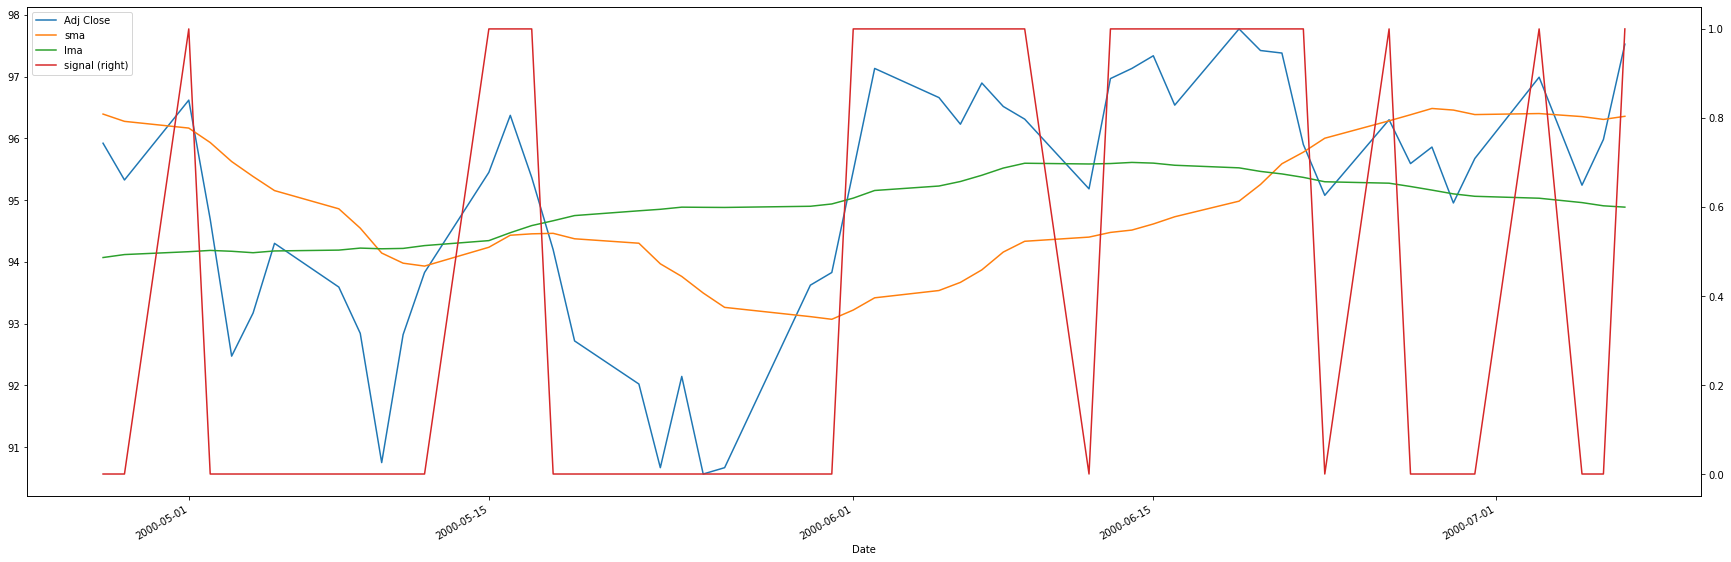

In [129]:
plot_position = (df[['Adj Close', 'sma', 'lma', 'signal']]).iloc[80:130].plot(secondary_y = 'signal', figsize = (30,10))
plot_position

Buy and Hold return 4.023132296183947
Strategy return 1.4506645368065656


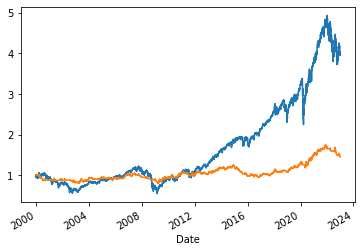

In [135]:
(df['buy&hold_return']+1).cumprod().plot()
(df['strategy_return']+1).cumprod().plot()
print(f'Buy and Hold return {bnh}')
print(f'Strategy return {stg}')

Start date,2000-01-03
End date,2022-12-29
Total months,275
,Backtest
Annual return,1.633%
Cumulative returns,45.066%
Annual volatility,9.297%
Sharpe ratio,0.22
Calmar ratio,0.07
Stability,0.69
Max drawdown,-24.793%


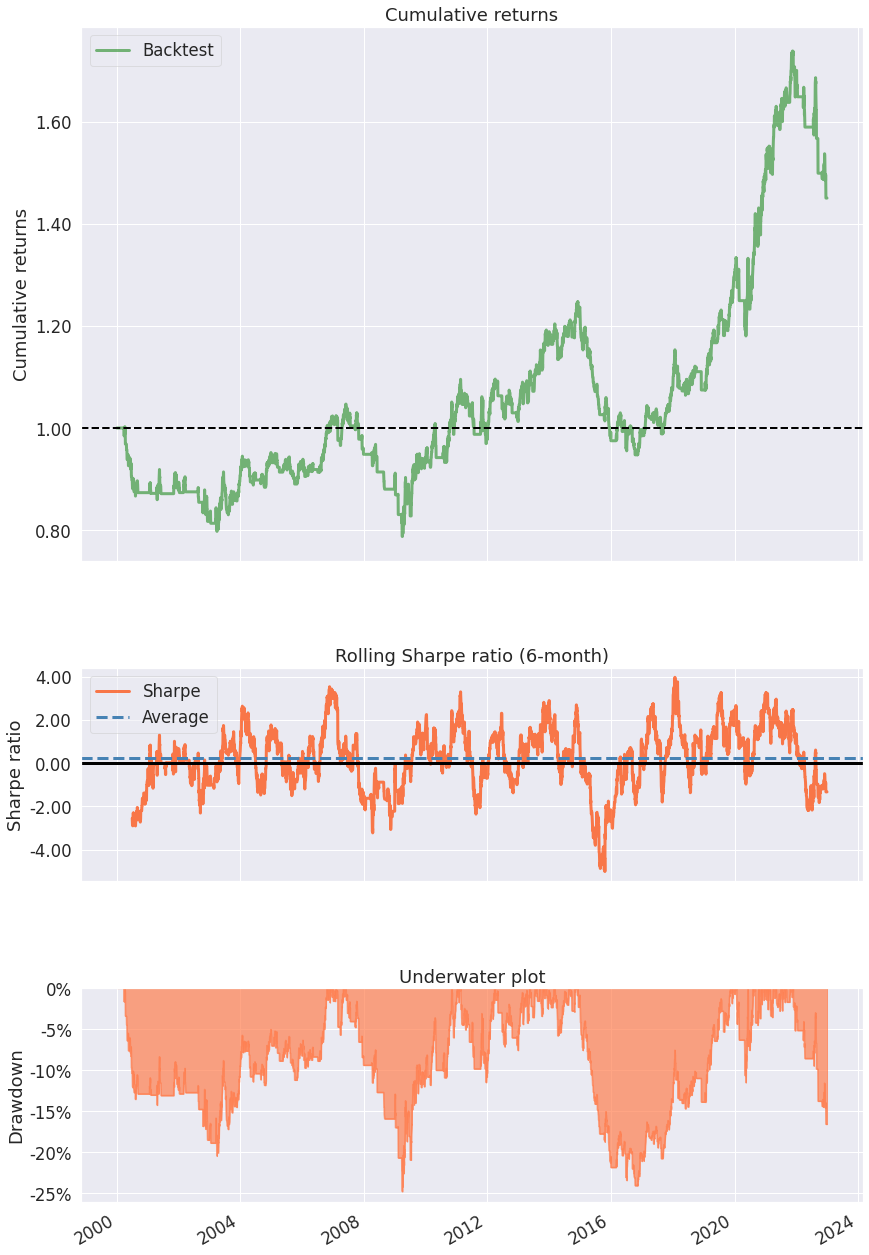

In [131]:
pf.create_simple_tear_sheet(df['strategy_return'])